In [ ]:
## Importação do banco de dados e Matplot para graficos
import sqlite3
import matplotlib.pyplot as plt

con = sqlite3.connect('chinook.db')
cursor = con.cursor()

In [ ]:
### Script BD

sql = '''
SELECT
    Name,
    count(albums.AlbumId) AS 'qtde Abuns'
FROM
    albums
INNER JOIN artists
ON albums.ArtistId = artists.ArtistId
GROUP BY artists.Name
ORDER BY count(albums.AlbumId) DESC
LIMIT 10;
'''
#CNX com DB
cursor.execute(sql)
#Guardando dados do banco de dados
linhas = cursor.fetchall()
for linha in linhas:
    print(linha)

('Iron Maiden', 21)
('Led Zeppelin', 14)
('Deep Purple', 11)
('U2', 10)
('Metallica', 10)
('Ozzy Osbourne', 6)
('Pearl Jam', 5)
('Various Artists', 4)
('Van Halen', 4)
('Lost', 4)


In [ ]:
## Separando dados da variavel linha
artistas = []
albums = []
for linha in linhas:
    artistas.append(linha[0])
    albums.append(linha[1])
print(artistas)
print(albums)

['Iron Maiden', 'Led Zeppelin', 'Deep Purple', 'U2', 'Metallica', 'Ozzy Osbourne', 'Pearl Jam', 'Various Artists', 'Van Halen', 'Lost']
[21, 14, 11, 10, 10, 6, 5, 4, 4, 4]


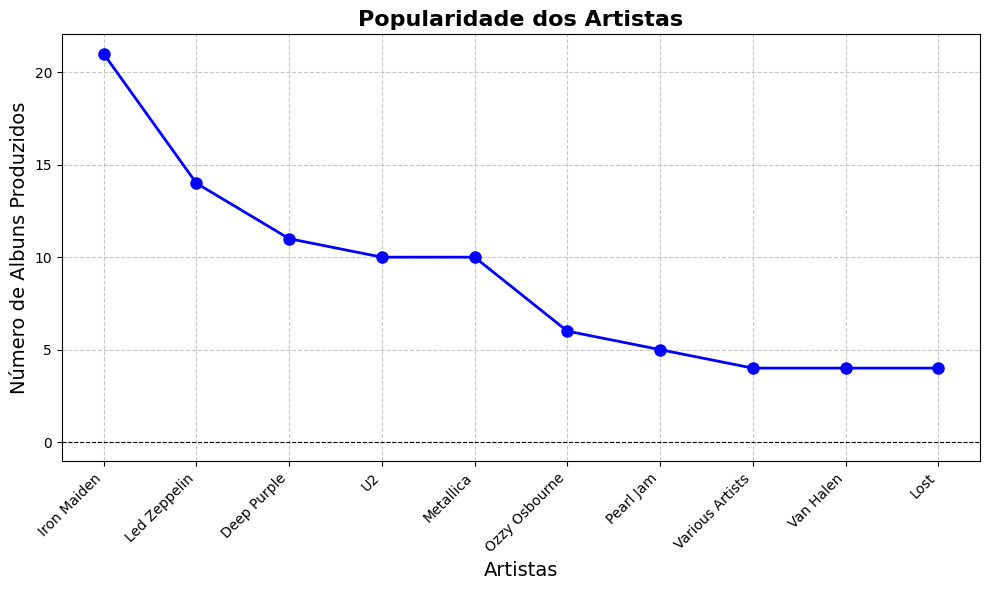

In [ ]:
# Cria uma nova figura e um eixo
fig, ax = plt.subplots(figsize=(10, 6))

# Cria o gráfico de linhas
ax.plot(artistas, albums, marker='o', linestyle='-', color='b', markersize=8, linewidth=2) # Changed 'valores' to 'albums'

# Adiciona títulos e rótulos
ax.set_title('Popularidade dos Artistas', fontsize=16, fontweight='bold')
ax.set_xlabel('Artistas', fontsize=14)
ax.set_ylabel('Número de Albuns Produzidos', fontsize=14)

# Melhora a apresentação dos rótulos no eixo x
plt.xticks(rotation=45, ha='right')

# Adiciona uma grade para melhor visualização
ax.grid(True, linestyle='--', alpha=0.7)

# Adiciona uma linha horizontal no nível 0
ax.axhline(y=0, color='k', linestyle='--', linewidth=0.8)

# Ajusta o layout para evitar sobreposição
plt.tight_layout()

# Mostra o gráfico
plt.show()

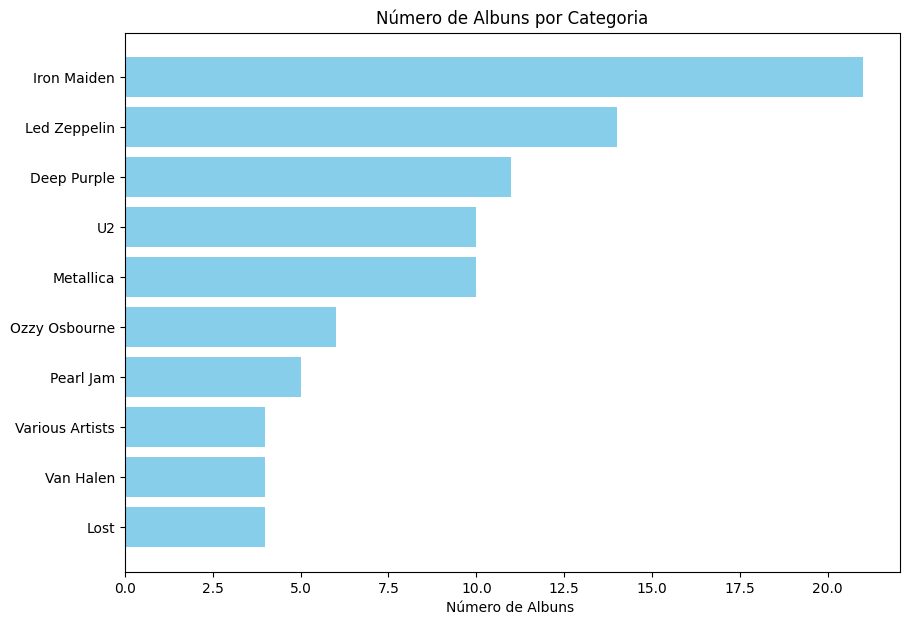

In [ ]:
plt.figure(figsize=(10, 7))
plt.barh(artistas, albums, color='skyblue')
plt.xlabel('Número de Albuns ')
plt.title('Número de Albuns por Categoria')
plt.gca().invert_yaxis()
plt.show()

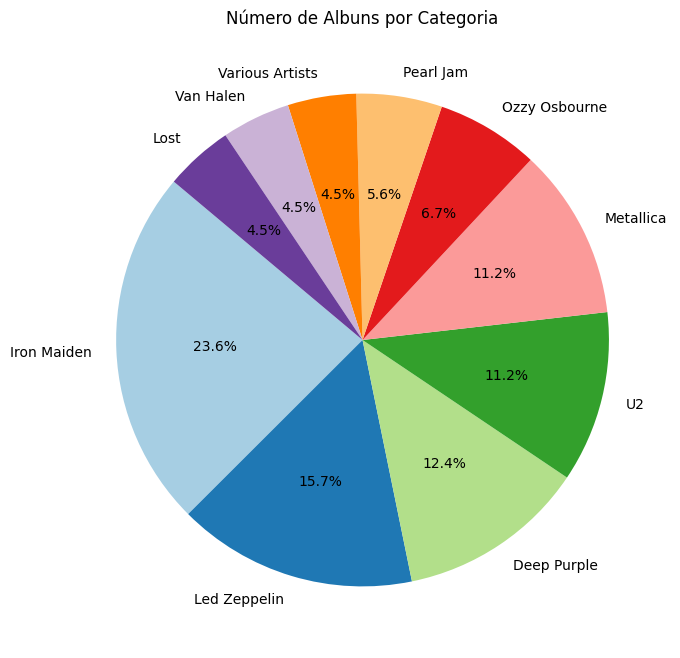

In [ ]:
plt.figure(figsize=(8, 8))  # Define o tamanho da figura
# Substitua 'categorias' por 'artistas' se você quiser usar os nomes dos artistas como rótulos
plt.pie(albums, labels=artistas, autopct='%1.1f%%', colors=plt.cm.Paired(range(len(artistas))), startangle=140)  # Cria o gráfico de pizza
plt.title('Número de Albuns por Categoria')  # Título do gráfico
plt.show()

In [ ]:
# Analise de Faturamento por artista

sql1 = '''
SELECT a.Name AS Artist,
       SUM(ii.UnitPrice * ii.Quantity) AS TotalRevenue
FROM invoice_items ii
JOIN tracks t ON ii.TrackId = t.TrackId
JOIN albums al ON t.AlbumId = al.AlbumId
JOIN artists a ON al.ArtistId = a.ArtistId
GROUP BY a.Name
ORDER BY TotalRevenue DESC
LIMIT 10;
'''
cursor.execute(sql1)
linhas = cursor.fetchall()
for linha in linhas:
    print(linha)

('Iron Maiden', 138.5999999999998)
('U2', 105.92999999999982)
('Metallica', 90.0899999999999)
('Led Zeppelin', 86.12999999999992)
('Lost', 81.58999999999997)
('The Office', 49.75000000000001)
('Os Paralamas Do Sucesso', 44.550000000000004)
('Deep Purple', 43.56)
('Faith No More', 41.58)
('Eric Clapton', 39.599999999999994)


In [ ]:
## Separando dados da variavel linha
artistas_faturamento = []
faturamento = []
for linha in linhas:
    artistas_faturamento.append(linha[0])
    faturamento.append(linha[1])
print(artistas_faturamento)
print(faturamento)

['Iron Maiden', 'U2', 'Metallica', 'Led Zeppelin', 'Lost', 'The Office', 'Os Paralamas Do Sucesso', 'Deep Purple', 'Faith No More', 'Eric Clapton']
[138.5999999999998, 105.92999999999982, 90.0899999999999, 86.12999999999992, 81.58999999999997, 49.75000000000001, 44.550000000000004, 43.56, 41.58, 39.599999999999994]


In [ ]:
# Arrendodando os valores de faturamento
faturamento_arredondado = [round(num, 2) for num in faturamento]
print(faturamento_arredondado)

[138.6, 105.93, 90.09, 86.13, 81.59, 49.75, 44.55, 43.56, 41.58, 39.6]


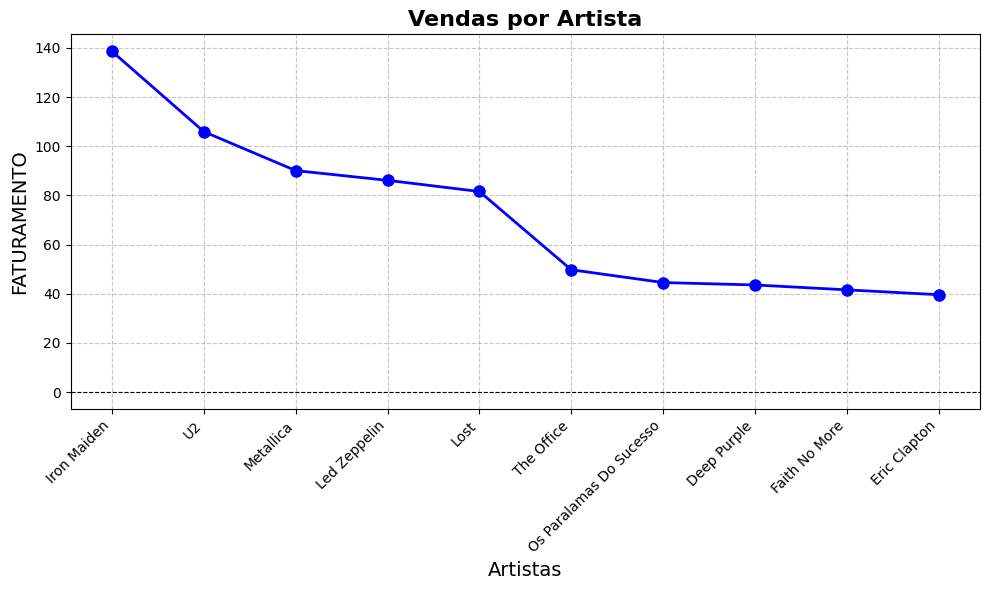

In [ ]:

fig, ax = plt.subplots(figsize=(10, 6))


ax.plot(artistas_faturamento, faturamento, marker='o', linestyle='-', color='b', markersize=8, linewidth=2) # Changed 'valores' to 'albums'

ax.set_title('Vendas por Artista', fontsize=16, fontweight='bold')
ax.set_xlabel('Artistas', fontsize=14)
ax.set_ylabel('FATURAMENTO', fontsize=14)

plt.xticks(rotation=45, ha='right')


ax.grid(True, linestyle='--', alpha=0.7)

# Adiciona uma linha horizontal no nível 0
ax.axhline(y=0, color='k', linestyle='--', linewidth=0.8)

# Ajusta o layout para evitar sobreposição
plt.tight_layout()

# Mostra o gráfico
plt.show()

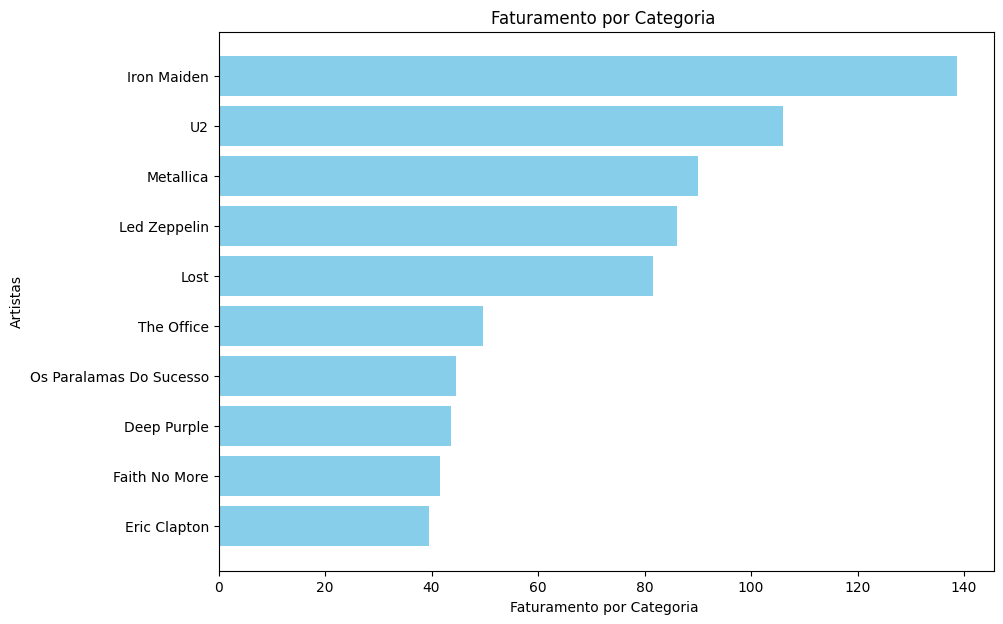

In [ ]:
plt.figure(figsize=(10, 7))
plt.barh(artistas_faturamento, faturamento, color='skyblue')
plt.xlabel('Faturamento por Categoria ')
plt.title('Faturamento por Categoria ')
plt.ylabel('Artistas')
plt.gca().invert_yaxis()
plt.show()

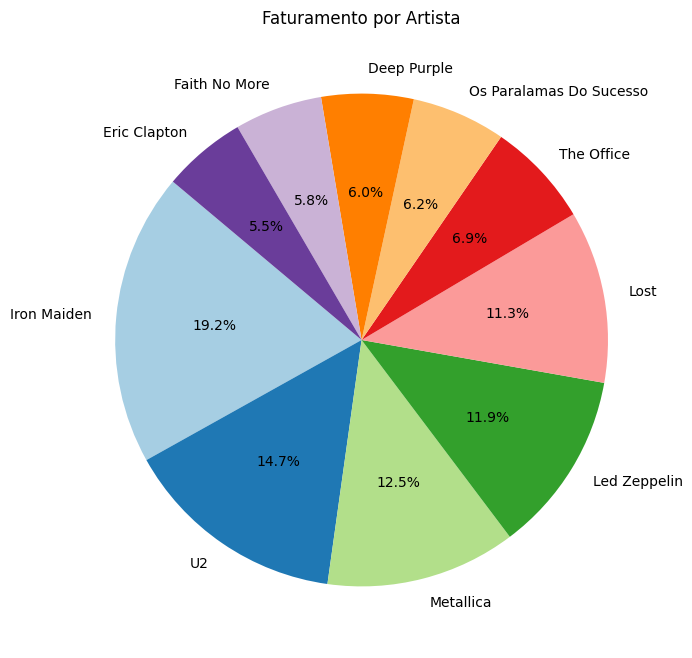

In [42]:
plt.figure(figsize=(8, 8))
plt.pie(faturamento, labels=artistas_faturamento, autopct='%1.1f%%', colors=plt.cm.Paired(range(len(artistas))), startangle=140)
plt.title('Faturamento por Artista')
plt.show()